# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [2]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

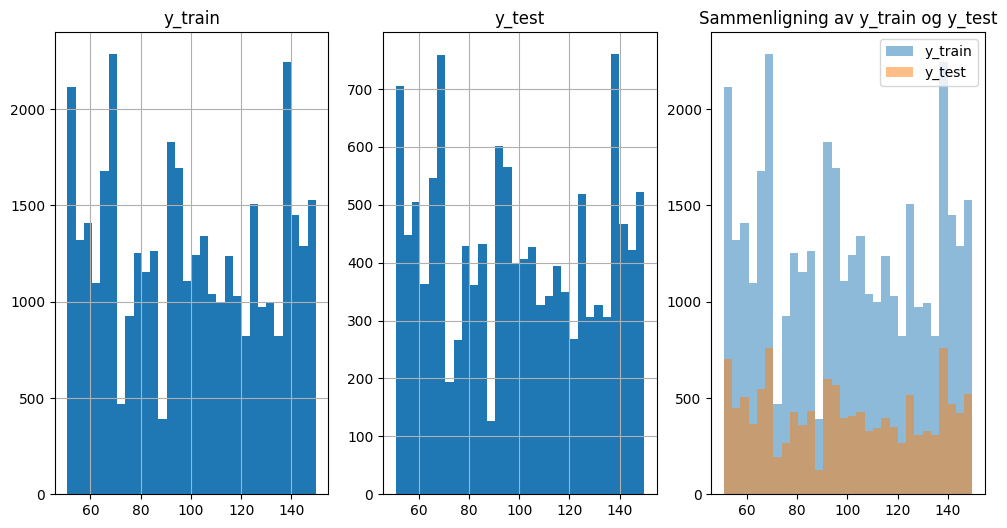

In [42]:
#TODO: visualiser y_train og y_test i et histogram
import matplotlib.pyplot as plt
import seaborn as sns
# visualiser y_train og y_test i et histogram
plt.figure(figsize=(12, 6))
## y_train
plt.subplot(1, 3, 1)
y_train.hist(bins=30)
plt.title('y_train')
## y_test
plt.subplot(1, 3, 2)
y_test.hist(bins=30)
plt.title('y_test')

plt.subplot(1,3,3)
plt.hist(y_train, bins=30, alpha=0.5, label='y_train')
plt.hist(y_test, bins=30, alpha=0.5, label='y_test')
plt.legend(loc='upper right')
plt.title("Sammenligning av y_train og y_test")
# Vis plottet
plt.show()


**Svar:**
Klassifiseringsproblemer har vanligvis diskrete utfall, hvor dataene ofte kan grupperes i kategorier (for eksempel: epler og appelsiner). I et histogram for et klassifiseringsproblem vil du se separate stolper for hver kategori.

Regresjonsproblemer involverer kontinuerlige utfall, og et histogram relevant for regresjon vil dermed vise én kontinuerlig fordeling av verdier (for eksempel: prisene på hus).

For diskrete og kategoriske data vil histogrammet som regel ha separate, distinkte stolper. For kontinuerlige data vil histogrammet vise en jevn kurve eller mange stenger som flyter inn i hverandre uten tydelige skiller mellom dem.

> MEN dette er ikke tilfelle for alle histogram, dette histogrammet sepererer hver stolpe basert på numeriske verdier, dermed kan man konkludere at dette er et REGRESJONS problem!
- Basert på figuren ser det ut som vi skal løse et regresjonsproblem. 
  - Dette kan konkluderes fordi histogrammene viser kontinuerlige verdier på x-aksen, noe som er typisk for regresjonsproblemer hvor målet er å forutsi en kontinuerlig variabel. 
  - Hvis det var et klassifiseringsproblem, ville vi sannsynligvis se diskrete kategorier i stedet.

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [39]:
import seaborn as sns
def korrelasjonsmatrise(X, y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    
    # kalkuler korrelasjonsmatrisen
    corr_matrix = X_temp.corr()
    
    # visualiser korrelasjonsmatrisen med heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Korrelasjonsmatrise')
    plt.show()

# Eksempel på bruk av funksjonen:
# Anta at `X` er egenskaper og `y` er target Series
# korrelasjonsmatrise(X, y)

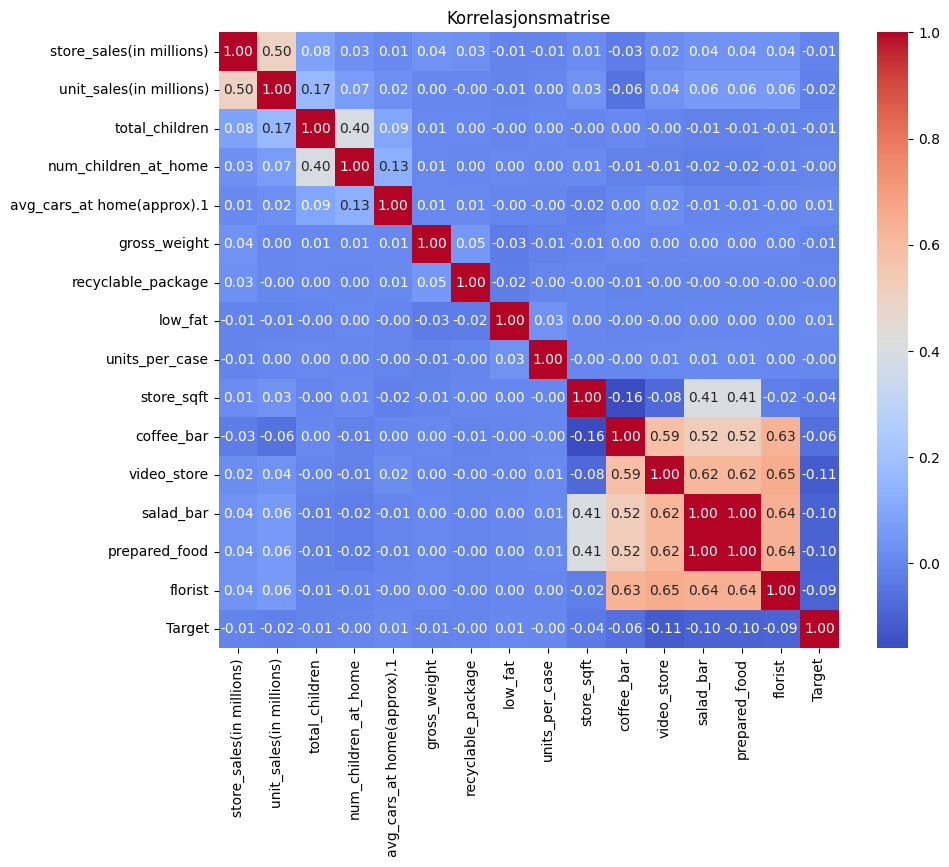

In [40]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

Utifra korrelasjonsmatrisen kan man anta at egenskapene som korrelerer mest positivt med Target(som ikke er Target i seg selv) er:
- avg_cars_at_home(approx).1
- low_fat

Disse egenskapene korrelerer med verdi på 0.01, noe som indikerer *noe* korrelasjon, verdier som er nærme 1 vil da indikere en sterkere positiv korrelasjon

Egenskapene med sterkest negativ korrelasjon til Target vil da være:
- video_store, -0.11
- salad_bar, -0,10
- prepared_food, -0,10

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

def hyperparameter_search(X, y):
    # definer modellen
    model = RandomForestRegressor(random_state=42)
    
    # definer hyperparameter grid
    param_grid = { # her kan du endre parametrene som skal søkes, 3 parametere, og minst 2 verdier pr. parameter
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
    
    # definer grid søket
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
    
    # kjør fit på grid søket
    grid_search.fit(X, y)
    
    # hent beste parameter og beste score
    best_params = grid_search.best_params_
    best_score = np.sqrt(-grid_search.best_score_)  # konverter til positiv RMSE
    
    return best_params, best_score

# Eksempel på bruk av funksjonen:
# anta at `X` er egenskaper DataFramen og `y` er target Series
# best_params, best_score = hyperparameter_search(X, y)

In [19]:
# Utfør hyperparameter søk
best_params, best_score = hyperparameter_search(X_train,y_train)
    

print(f"Best parameters: {best_params}\nBest RMSE: {best_score:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 29.1802
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 29.1802


__Svar:__
### Forklaring
__Modellsdefinisjon:__
Vi bruker RandomForestRegressor som modellen.

__Parametergrid:__
Vi definerer ett grid av hyperparametere som søkes over, 3 av dem med minst 2 verdier som spesifisert:
- n_estimators: Antall trær i skogen (RFR definisjon).
- max_depth: Maksimal dybde på treet.
- min_samples_split: Minimum antall prøver som kreves for å dele en intern node.

__Grid Search:__
Vi bruker GridSearchCV for å utføre hyperparametersøk med 3-fold kryssvalidering og "neg_mean_squared_error"-metrikken.

__Vi "fit"er Grid Search:__
Vi bruker "fit" på grid search og kobler til dataene.

__Beste Parametere og Score:__
Vi henter og skriver ut de beste parameterne i tillegg til den beste scoren (konvertert til RMSE).

### Tolkning av Resultater
Ved å kjøre koden over, så hentes den beste kombinasjonen av hyperparametere og tilhørende RMSE, noe som gir en forståelse på hvor godt modellen presterer med de valgte parameterne.
- Beste Parametere: 
  - Kombinasjonen av hyperparametere som resulterte i lavest RMSE.

- Beste RMSE: 
  - Root mean squared error for den beste modellen, som indikerer modellens ytelse.

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [ ]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error
from sklearn.model_selection import KFold


def kryssvalidering(X, y, best_params):
    # definer modellen
    model = RandomForestRegressor(random_state=42, **best_params)
    
    # definer kryssvalideringsmetoden
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # lag lister for å lagre mean absolute error og mean squared error
    mae_scores, mse_scores = [], []
     
    # iterer gjennom hvert fold, hvor n_splits=5, 
    # er parameteren i KFold som deler datasettet inn i 5 folds
    for i,(train_i , test_i) in enumerate(kf.split(X)):
        # del inn i trenings- og testsett
        X_train, X_test = X.iloc[train_i], X.iloc[test_i] # X er en DataFrame
        y_train, y_test = y.iloc[train_i], y.iloc[test_i] # y er en Series
        
        # tilpass modellen
        model.fit(X_train, y_train)
        # prediker
        y_pred = model.predict(X_test)
        
        # beregn mean absolute error og mean squared error
        mae = np.mean(abs(y_test - y_pred))
        mse = np.mean((y_test - y_pred)**2)

        # skriv ut mean absolute error og mean squared error
        print(f'Runde {i+1}\n\tMAE: {mae:.4f}, MSE: {mse:.4f}')

        # legg til i listene
        mae_scores.append(mae)
        mse_scores.append(mse)
    
    # returner listene med mean absolute error og mean squared error
    return mae_scores, mse_scores
    
# Eksempel på bruk av funksjonen:
# anta at `X` er egenskaper DataFramen og `y` er target Series
# mae_scores, mse_scores = kryssvalidering(X, y, best_params)






In [28]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent
mae_scores, mse_scores = kryssvalidering(X_train, y_train, best_params)

# beregn gjennomsnitt og standardavvik for mean absolute error og mean squared error
mean_mae = np.mean(mae_scores) # gjennomsnitt for mean absolute error
std_mae = np.std(mae_scores) # standardavvik for mean absolute error
mean_mse = np.mean(mse_scores) # gjennomsnitt for mean squared error
std_mse = np.std(mse_scores)# standardavvik for mean squared error
print("\nResultater for kryssvalidering: ")
print(f"\tGjennomsnitt MAE: {mean_mae:.4f},\tstandardavvik: +/- {std_mae:.4f}")
print(f"\tGjennomsnitt MSE: {mean_mse:.4f},\tstandardavvik: +/- {std_mse:.4f}")

# beregn hvor stor den gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent
average_actual_mean_price = np.mean(y_train)

# beregn prosentvis feil
mae_percent = (mean_mae / average_actual_mean_price) * 100

# skriv ut prosentvis feil
print(f"\nMAE prosent: {mae_percent:.2f}%")





Runde 1
	MAE: 25.1812, MSE: 850.6139
Runde 2
	MAE: 25.2496, MSE: 856.0931
Runde 3
	MAE: 25.0960, MSE: 852.4481
Runde 4
	MAE: 25.0050, MSE: 850.8102
Runde 5
	MAE: 24.9271, MSE: 835.0567

Resultater for kryssvalidering: 
	Gjennomsnitt MAE: 25.0918,	standardavvik: +/- 0.1162
	Gjennomsnitt MSE: 849.0044,	standardavvik: +/- 7.2457

MAE prosent: 25.26%


**Svar:**

#### Forklaring:
1. **Modelldefinisjon**: Vi bruker RandomForestRegressor med de beste hyperparametrene som ble funnet tidligere.
2. **Kryssvalideringsstrategi**: Vi bruker KFold med 5 delinger (splits).
3. **Logging av feil**: For hver fold beregner og logger vi "mean absolute error" (MAE) og "mean squared error" (MSE).
4. **Beregning av gjennomsnitt og standardavvik**: Vi beregner gjennomsnittet og standardavviket for MAE og MSE på tvers av alle foldene.
5. **Sammenligning med gjennomsnittlig faktisk pris**: Vi beregner gjennomsnittlig faktisk pris i treningsdataene og sammenligner den gjennomsnittlige absolutte feilen (MAE) med dette gjennomsnittet.
#### Resultatfortolkning:
- **Gjennomsnitt og standardavvik for feil**: Disse verdiene gir en indikasjon på modellens ytelse og variasjonen i feilene på tvers av forskjellige fold.
- **Sammenligning med gjennomsnittlig faktisk pris**: Denne sammenligningen hjelper med å forstå størrelsen på prediksjonsfeilene i forhold til de faktiske prisene.

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [30]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene (bruk optimale parametere gitt av hyperparameter_search)

# definer modellen og bruk beste parametre
model = RandomForestRegressor(random_state=42, **best_params)

# tilpass modellen
model.fit(X_train, y_train)

# prediker
y_pred = model.predict(X_test)

# beregn mean absolute error og mean squared error
mae = np.mean(abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)

# skriv ut mean absolute error og mean squared error

print(f'MAE: {mae:.4f}, MSE: {mse:.4f}')

# sammenlign feilen på prediksjon med gjennomsnittsprisen i testsettet
average_actual_mean_price_test = np.mean(y_test)

# beregn prosentvis feil sammenlignet med gjennomsnittsprisen i testsettet
mae_percent_test = (mae / average_actual_mean_price_test) * 100

# skriv ut prosentvis feil for testsettet 
print(f"MAE prosent feil sammenlignet faktisk pris i testdata: \n\t MAE prosent feil:{mae_percent_test:.2f}%")




MAE: 25.1335, MSE: 849.6338
MAE prosent feil sammenlignet faktisk pris i testdata: 
	 MAE prosent feil:25.31%


**Svar:**

MAE prosent feil sammenlignet faktisk pris i testdata: 
<br> MAE prosent feil:25.31%